## I have conducted the following analyses using the dataset 'List of best-selling PlayStation 4 video games': 
### - Sales analysis by game genre
### -Most successful developers and publishers
### -The correlation between release date and sales

In [1]:
#Importing libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Importing database
base = pd.read_csv(r"C:\Users\cacam\Ciência de Dados\Projeto - PlayStation\List of best-selling PlayStation 4 video games.csv")

In [3]:
#Viewing database
base.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


In [4]:
#Database Informations
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             33 non-null     object
 1   Copies sold      33 non-null     object
 2   Release date[a]  33 non-null     object
 3   Genre(s)         33 non-null     object
 4   Developer(s)     33 non-null     object
 5   Publisher(s)     33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


In [5]:
#Changing Dtype - column 'Copies sold' to float
def convert_to_float(s):
    return float(s.replace(' million', ''))
base['Copies sold'] = base['Copies sold'].apply(convert_to_float)

In [6]:
#Changing Dtype - column 'Release date[a]' to date
base['Release date[a]'] = pd.to_datetime(base['Release date[a]'])

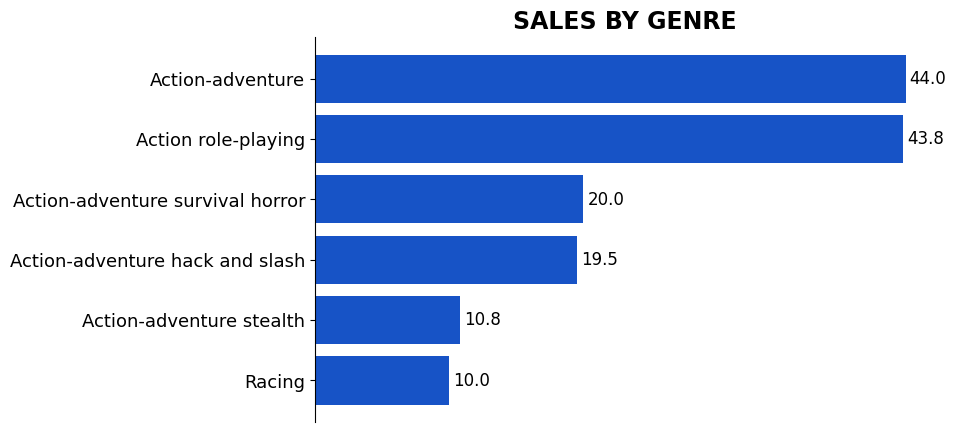

In [8]:
#Sales analysis by genre
sales_genres = base.groupby('Genre(s)')['Copies sold'].sum()
top_genres = sales_genres.nlargest(6)

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('SALES BY GENRE', fontsize=17, fontweight='bold')

ax.tick_params(axis='y', labelsize=13)

ax.invert_yaxis()

ax.barh(top_genres.index, top_genres.values, color='#1753C6')
for i in range(0, 6):
    ax.annotate('{:,.1f}'.format(top_genres.values[i]).replace(',', '.'),
                (top_genres.values[i], top_genres.index[i]),
                va='center',
                xytext=(3, 0), textcoords='offset points',
                fontsize=12
                )

ax.xaxis.set_visible(False)
plt.yticks(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()


### The action and adventure games with their variations dominate the game market

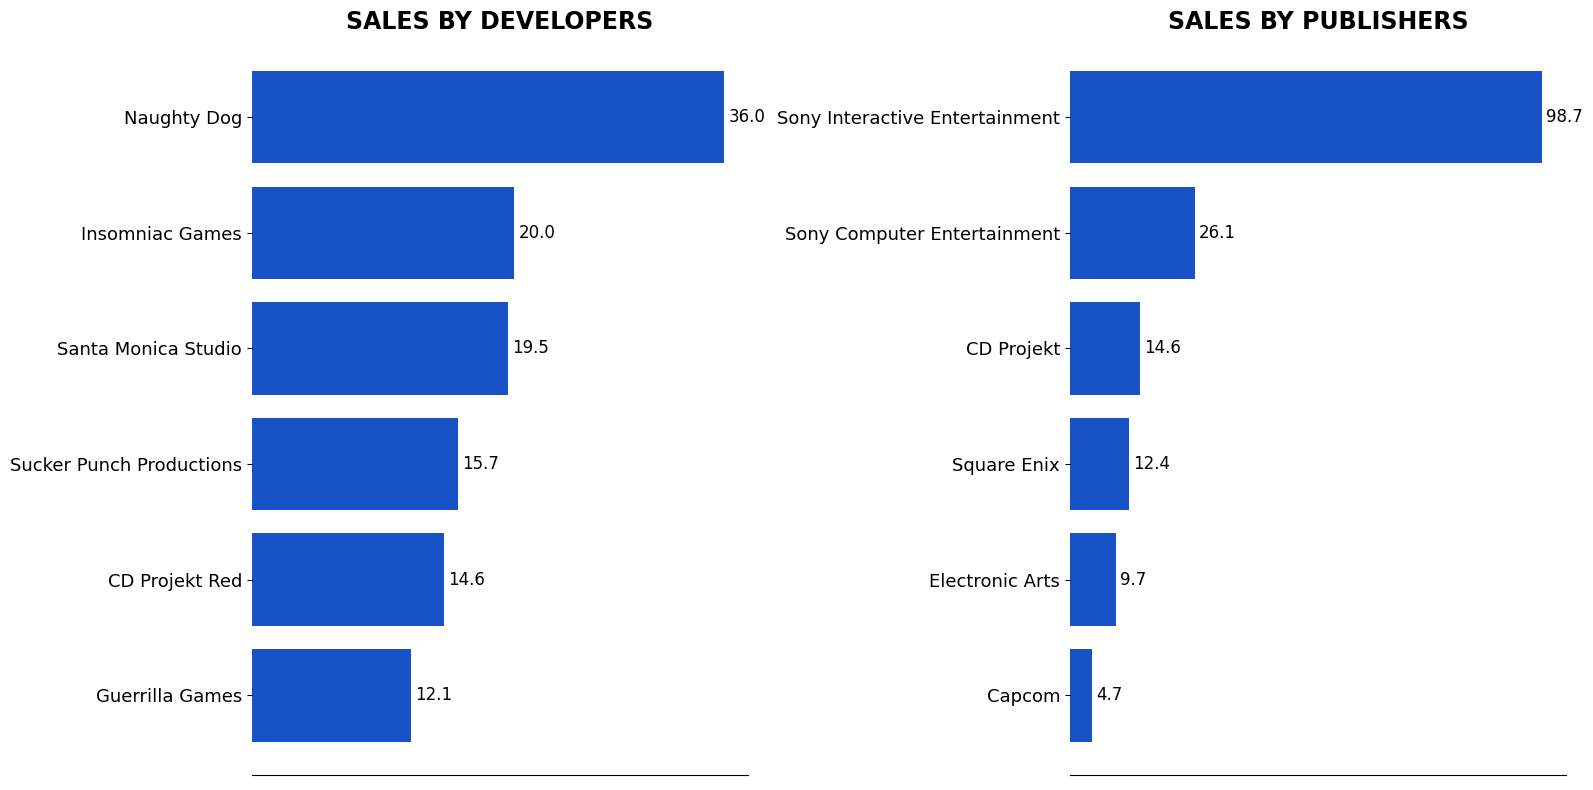

In [12]:
#Analysis of sales by developers and publishers
sales_developers = base.groupby('Developer(s)')['Copies sold'].sum()
sales_publishers = base.groupby('Publisher(s)')['Copies sold'].sum()
top_developers = sales_developers.nlargest(6)
top_publishers = sales_publishers.nlargest(6)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.set_title('SALES BY DEVELOPERS', fontsize=17, fontweight='bold')
ax1.tick_params(axis='y', labelsize=13)
ax1.invert_yaxis()
ax1.barh(top_developers.index, top_developers.values, color='#1753C6')
for i in range(0, 6):
    ax1.annotate('{:,.1f}'.format(top_developers.values[i]).replace(',', '.'),
                 (top_developers.values[i], top_developers.index[i]),
                 va='center',
                 xytext=(3, 0), textcoords='offset points',
                 fontsize=12
                 )
ax1.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.set_title('SALES BY PUBLISHERS', fontsize=17, fontweight='bold')
ax2.tick_params(axis='y', labelsize=13)
ax2.invert_yaxis()
ax2.barh(top_publishers.index, top_publishers.values, color='#1753C6')
for i in range(0, 6):
    ax2.annotate('{:,.1f}'.format(top_publishers.values[i]).replace(',', '.'),
                 (top_publishers.values[i], top_publishers.index[i]),
                 va='center',
                 xytext=(3, 0), textcoords='offset points',
                 fontsize=12
                 )
ax2.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
base.loc[base['Developer(s)'] == 'CD Projekt Red']

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
3,The Witcher 3: Wild Hunt,10.80,2015-05-18,Action role-playing,CD Projekt Red,CD Projekt
14,Cyberpunk 2077,3.83,2020-12-10,Action role-playing,CD Projekt Red,CD Projekt


### Analyzing the sales by developers and publishers, it's clear that Sony dominates the market. Looking at the top developers in terms of sales, almost all belong to Sony, except for CD Projekt Red, published by CD Projekt.

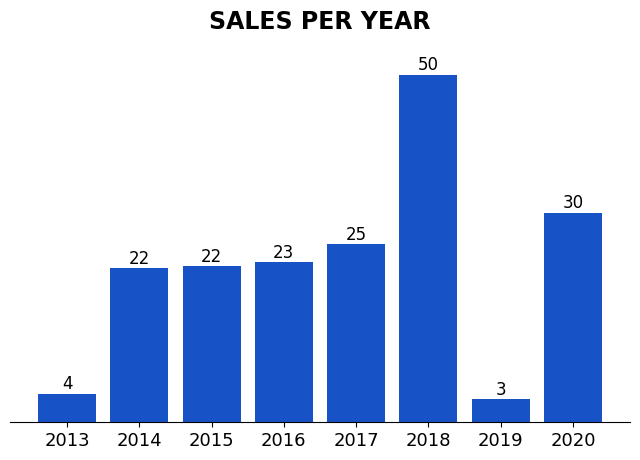

In [11]:
base['Year'] = base['Release date[a]'].dt.year
sales_year = base.groupby('Year')['Copies sold'].sum()
fig, ax = plt.subplots(figsize = (8, 5))

ax.set_title('SALES PER YEAR', fontsize = 17, fontweight = 'bold') 

ax.xaxis.set_ticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]) 

ax.tick_params(axis = 'x', labelsize = 13) 
 
ax.bar(sales_year.index, sales_year.values, color = '#1753C6')

for i in range(0, 8):
    ax.annotate('{:,.0f}'.format(sales_year.values[i]).replace(',', '.'),
               (sales_year.index[i], sales_year.values[i]),
               ha = 'center',
               xytext = (0, 3), textcoords = 'offset points',
               fontsize = 12
               )
    
ax.set_yticks([0, 55]) 
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

### We can observe that the years with the highest sales were 2017, 2018, and 2020. 2018 stands out with the highest sales, showing a significant difference compared to all other years. To better understand the sales by year, especially in the year 2018, let's analyze the games sold

In [13]:
#Top 10 best-selling games, related to the year
games = base.groupby(['Year', 'Game'])['Copies sold'].sum()
games = games.reset_index()
games = games.sort_values('Copies sold', ascending = False)
n = 10
top_games = games.head(n)
top_games

,Year,Game,Copies sold
24,2018,Marvel's Spider-Man,20.00
23,2018,God of War,19.50
14,2016,Uncharted 4: A Thief's End,16.00
10,2015,The Witcher 3: Wild Hunt,10.80
32,2020,The Last of Us Part II,10.00
19,2017,Horizon Zero Dawn,10.00
6,2014,The Last of Us Remastered,10.00
30,2020,Ghost of Tsushima,9.73
9,2015,Star Wars Battlefront,8.42
18,2017,Gran Turismo Sport,8.00


In [14]:
#Analyzing how many games are on the best-sellers list each year.
base.Year.value_counts()

2017    7
2020    5
2014    5
2018    4
2016    4
2015    4
2019    2
2013    2
Name: Year, dtype: int64

#### The two best-selling games, Marvel's Spider-Man and God of War overall, were both released in 2018. Accounting for 79% of the sales in 2018, justifying the higher sales success in that year
#### The years 2020, 2017, 2016, and 2015 have 1 or 2 highly sold games, accounting for over 65% of the sales in their respective years
#### In 2014, The Last of Us Remastered had significant sales, along with 4 more games in that list. On the other hand, the less successful years, 2013 and 2019, do not have games in the top 10 best-sellers, with only 2 games sold in total for each year, and these games have relatively low sales.

#### Overall, I could analyze that the sales success by year highly depends on 1 or 2 specific games of great success.